In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv("winequality-red.csv")
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1539,7.2,0.39,0.32,1.8,0.065,34.0,60.0,0.99714,3.46,0.78,9.9,5
1361,8.3,0.85,0.14,2.5,0.093,13.0,54.0,0.99724,3.36,0.54,10.1,5
556,10.9,0.53,0.49,4.6,0.118,10.0,17.0,1.00020,3.07,0.56,11.7,6
1413,9.9,0.57,0.25,2.0,0.104,12.0,89.0,0.99630,3.04,0.90,10.1,5
255,8.0,0.57,0.23,3.2,0.073,17.0,119.0,0.99675,3.26,0.57,9.3,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#checking for null values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
sns.set(style="whitegrid")

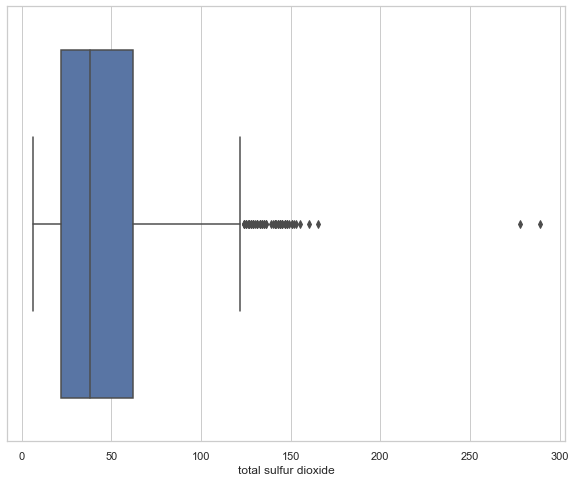

In [9]:
#we can see total sulfur dioxide has some outliers so we'll replace them with the mean value 
plt.figure(figsize=(10,8))
sns.boxplot(x=df["total sulfur dioxide"])

In [10]:
#removing the outliers which are > 200
df["total sulfur dioxide"] = np.where(df["total sulfur dioxide"] > 200, np.mean(df["total sulfur dioxide"]), df["total sulfur dioxide"])

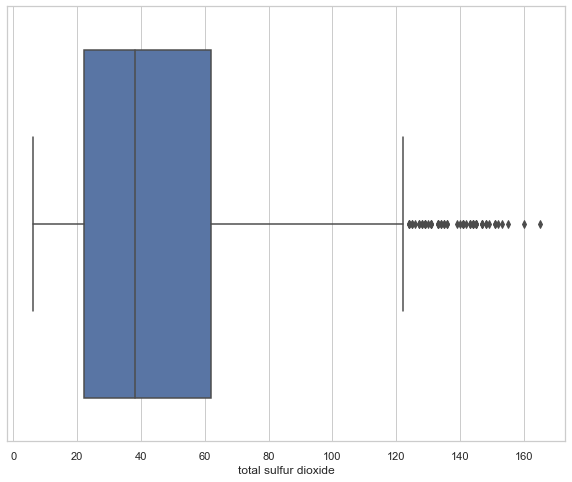

In [11]:
#plotting the boxplot again 
plt.figure(figsize=(10,8))
sns.boxplot(x=df["total sulfur dioxide"])

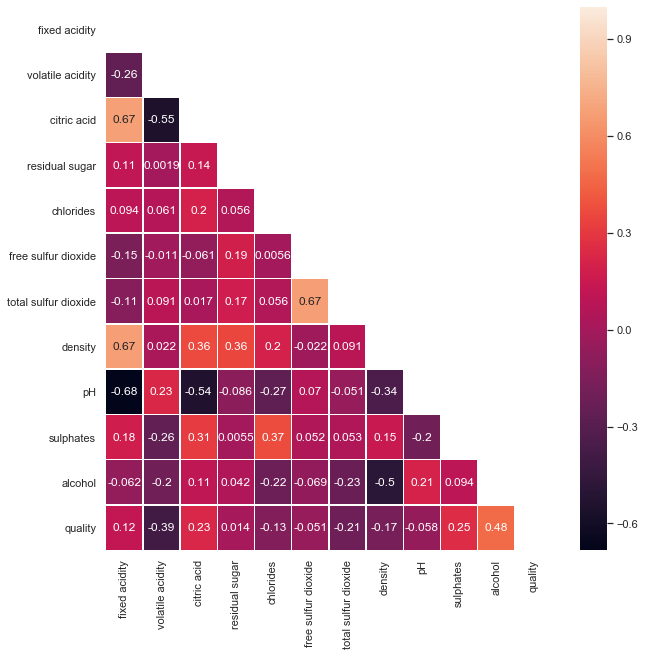

In [12]:
correlation = df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(10,10))
sns.heatmap(correlation, mask=mask, annot=True, linewidth=0.5)

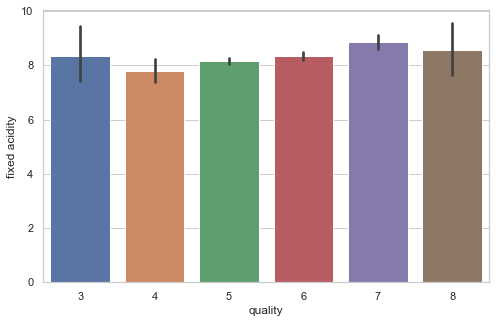

In [13]:
#looking at the barplot below we can see that fixed acidity doesn't really have a specific influence on the quality of wine
plt.figure(figsize=(8,5))
sns.barplot(x="quality", y="fixed acidity", data=df)

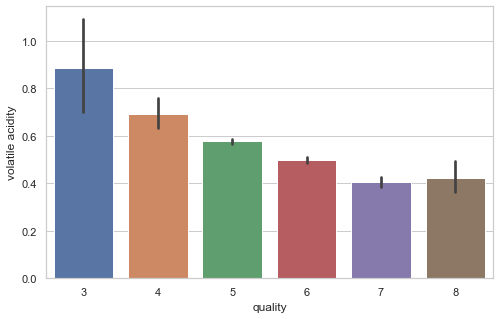

In [14]:
#Quality of wine is high if the volatile acidity is less
plt.figure(figsize=(8,5))
sns.barplot(x="quality", y="volatile acidity", data=df)

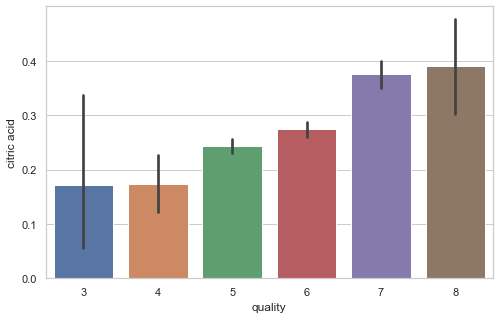

In [15]:
#Quality of wine is high if the citric acid is high
plt.figure(figsize=(8,5))
sns.barplot(x="quality", y="citric acid", data=df)

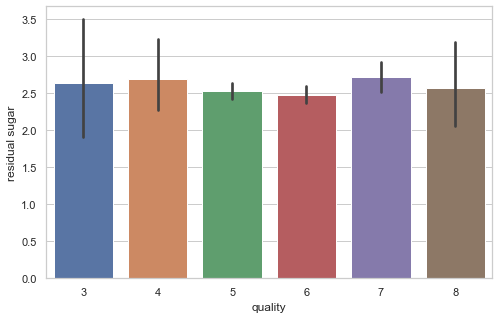

In [16]:
#Residual sugar also doesn't have any specific influence on the quality of wine
plt.figure(figsize=(8,5))
sns.barplot(x="quality", y="residual sugar", data=df)

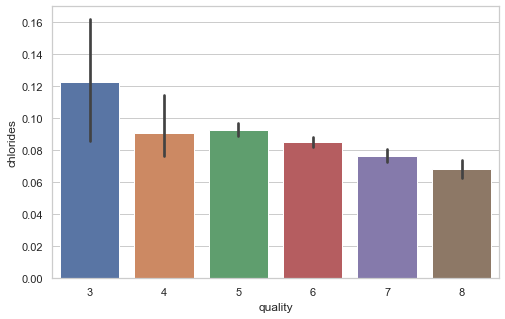

In [17]:
#Quality of wine is high if the chloride content is less
plt.figure(figsize=(8,5))
sns.barplot(x="quality", y="chlorides", data=df)

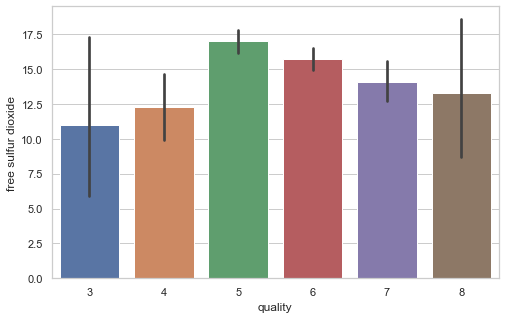

In [18]:
#Free sulfur dioxide also doesn't really have any specific influence
plt.figure(figsize=(8,5))
sns.barplot(x="quality", y="free sulfur dioxide", data=df)

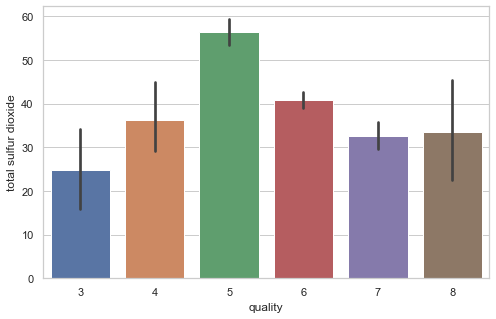

In [19]:
#Same with total sulfur dioxide
plt.figure(figsize=(8,5))
sns.barplot(x="quality", y="total sulfur dioxide", data=df)

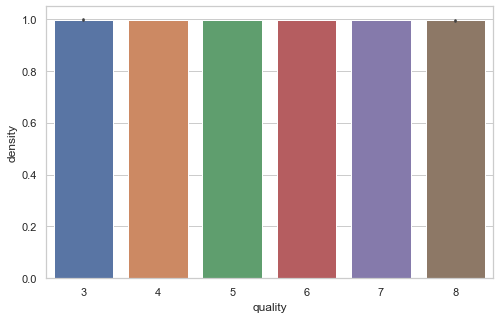

In [20]:
#Density is almost equal for all qualities of wine
plt.figure(figsize=(8,5))
sns.barplot(x="quality", y="density", data=df)

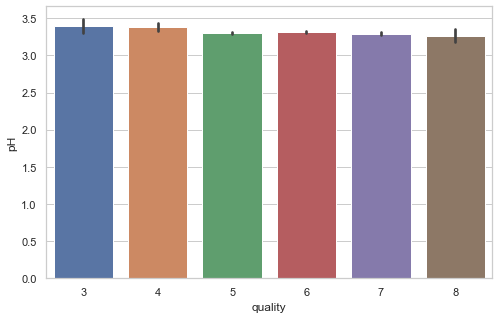

In [21]:
#pH is almost equal for all qualities of wine
plt.figure(figsize=(8,5))
sns.barplot(x="quality", y="pH", data=df)

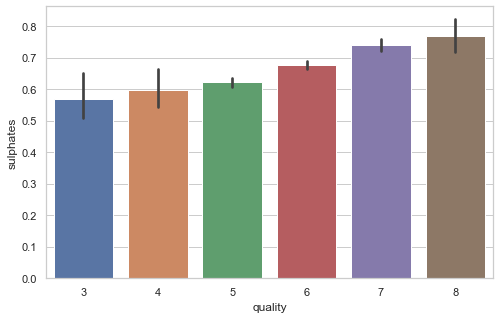

In [22]:
#Quality of wine is high if the sulphates content is high
plt.figure(figsize=(8,5))
sns.barplot(x="quality", y="sulphates", data=df)

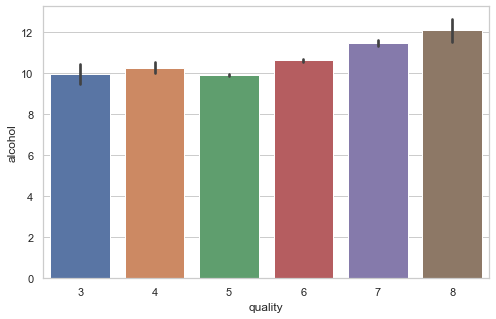

In [23]:
#Quality of wine increases as the alcohol content increases
plt.figure(figsize=(8,5))
sns.barplot(x="quality", y="alcohol", data=df)

In [24]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

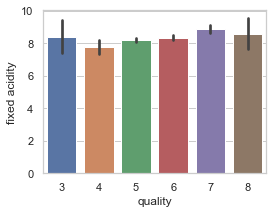

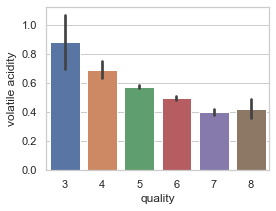

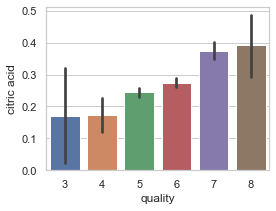

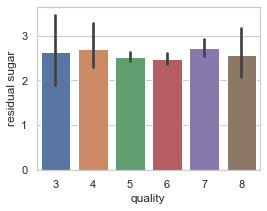

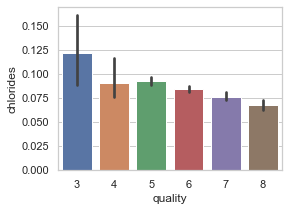

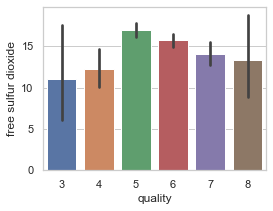

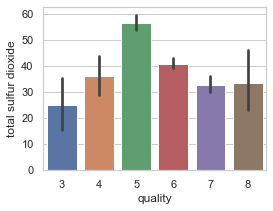

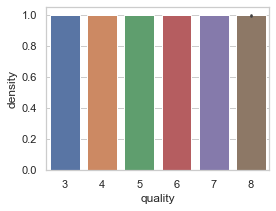

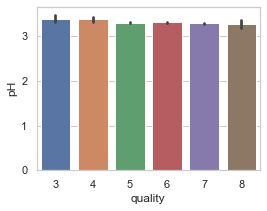

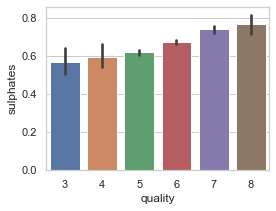

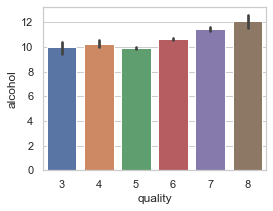

In [25]:
#plotting the same using a loop
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']
for feature in features:
    plt.figure(figsize=(4,3))
    sns.barplot(x="quality", y=feature, data=df)
    plt.show()

In [26]:
# dropping redundant features
# 1. fixed acidity has little correlation with our target variable "quality" and also has multicollinearity with the predictor variable
# "pH" which means it can be dropped
# 2. Similarly, we can see "residual sugar" and "free sulfur dioxide" have little correlation with our target variable "quality" and
# also "free sulfur dioxide" has multicollinearity with the feature "total sulfur dioxide". 

drop_features = ["fixed acidity", "residual sugar", "free sulfur dioxide"]
df.drop(drop_features, axis=1, inplace=True)
df.sample(5)

# We are done with the EDA, now we have our cleaned dataset

,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1095,0.400,0.47,0.087,20.0,0.99772,3.15,0.50,10.5,5
432,0.370,0.69,0.078,24.0,0.99580,3.00,0.65,12.8,6
1195,0.430,0.22,0.078,56.0,0.99633,3.52,0.60,9.5,6
1374,0.815,0.00,0.267,29.0,0.99471,3.32,0.51,9.8,3
425,0.840,0.03,0.059,48.0,0.99520,3.52,0.56,12.3,7


In [27]:
df.loc[df["quality"] == 3]

,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,0.580,0.66,0.074,47.0,1.00080,3.25,0.57,9.00,3
517,0.610,0.49,0.200,16.0,0.99940,3.16,0.63,8.40,3
690,1.185,0.00,0.097,14.0,0.99660,3.63,0.54,10.70,3
832,0.440,0.42,0.145,48.0,0.99832,3.38,0.86,9.90,3
899,1.020,0.02,0.084,11.0,0.99892,3.48,0.49,11.00,3
1299,1.580,0.00,0.137,9.0,0.99476,3.50,0.40,10.90,3
1374,0.815,0.00,0.267,29.0,0.99471,3.32,0.51,9.80,3
1469,0.980,0.05,0.061,49.0,0.99705,3.31,0.55,9.70,3
1478,0.875,0.05,0.082,14.0,0.99808,3.40,0.52,10.20,3
1505,0.760,0.02,0.078,12.0,0.99600,3.55,0.63,9.95,3


In [28]:
print(df["quality"].min())
print(round(df["quality"].mean(), 2))
print(df["quality"].max())

3
5.64
8


In [29]:
#converting "quality" into a categorical variable
for i in range(len(df["quality"])):
    if df["quality"][i] >= 3 and df["quality"][i] <= 5.64:
        df["quality"][i] = 0
    elif df["quality"][i] > 5.64 and df["quality"][i] <= 8:
        df["quality"][i] = 1  
#quality between 3 and the mean 5.64 become 0 meaning bad quality & between 5.46 and 8 become 1 meaning good quality

In [30]:
df["quality"].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [31]:
df.sample(5)

,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
277,0.18,0.51,0.104,23.0,0.9996,3.28,0.97,10.1,1
132,0.50,0.09,0.049,99.0,0.9937,3.63,0.63,13.0,0
472,0.37,0.55,0.083,68.0,0.9995,3.15,0.82,10.4,1
40,0.45,0.36,0.074,87.0,0.9978,3.33,0.83,10.5,0
158,0.68,0.00,0.073,22.0,0.9969,3.48,0.50,9.3,0


In [32]:
#splitting the independent and target features
X = df.drop(["quality"], axis=1)  
y = df["quality"]

In [33]:
#splitting the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)